- 회귀(regression) : 예측하는 대상이 임의의 숫자 (타깃)

In [5]:
# 데이터 준비
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

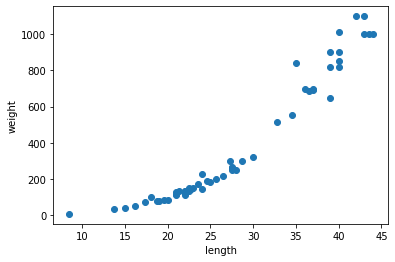

In [6]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련데이터는 열방향으로 있어야함.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [15]:
# 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
result = knr.score(test_input, test_target)
print("knr 정확도:" , result)
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print('mean_absolute_error:', mae)

knr 정확도: 0.992809406101064
mean_absolute_error: 19.157142857142862


결정 계수 R^2

= 1 - ( (타깃-예측)^2 의 합) / (타깃-평균)^2 의 합 )

- 1에서 가까우면 좋은 회귀모델
- 분자가 0에 가까워 질수록 좋다.

In [17]:
# 과대적합과 과소적합
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
## 결과 : 과소적합 (Underfitting)

0.9698823289099254
0.992809406101064


0.978211389719245
0.9840231023848637


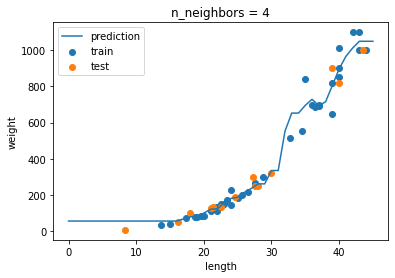

In [59]:
knr.n_neighbors = 4 # n_neighbors 값 조절.
knr.fit(train_input, train_target)

temp_input = np.arange(46).reshape(-1, 1) # 0 부터 45까지 input 생성
test_prediction = knr.predict(temp_input) 


print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

test_prediction = np.column_stack((temp_input, test_prediction))
sorted_prediction = test_prediction[test_prediction[:, 0].argsort()] # 정렬 방법

plt.scatter(train_input, train_target, label='train')
plt.scatter(test_input, test_target, label='test')
plt.plot(sorted_prediction[:,0], sorted_prediction[:,1], label='prediction')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.title('n_neighbors = ' + str(knr.n_neighbors))
plt.show()